# İş Problemi

Aşağıda 3 farklı kullanıcının sepet bilgileri verilmiştir. Bu sepet bilgilerine en uygun ürün önerisini birliktelik kuralı kullanarak yapınız. Ürün önerileri 1 tane ya da 1'den fazla olabilir. Karar kurallarını 2010-2011 Germany müşterileri üzerinden türetiniz.


Kullanıcı 1’in sepetinde bulunan ürünün id'si: 21987

Kullanıcı 2’in sepetinde bulunan ürünün id'si : 23235

Kullanıcı 3’in sepetinde bulunan ürünün id'si : 22747

# Veri Seti Hikayesi

Online Retail II isimli veri seti İngiltere merkezli bir perakende şirketinin 01/12/2009 - 09/12/2011 tarihleri arasındaki online satış işlemlerini içeriyor Şirketin ürün kataloğunda hediyelik eşyalar yer almaktadır ve çoğu müşterisinin toptancı olduğu bilgisi mevcuttur.

# Görev 1: Veriyi Hazırlama

### Adım 1:
Online Retail II veri setinden 2010-2011 sheet’ini okutunuz.

In [3]:
import pandas as pd
df_ = pd.read_excel('/Users/mericgenc/Desktop/Python - Data Science/Miuul Data Scientist Path/04 - Recommendation Systems/00_datasets/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df.shape

(541910, 8)

### Adım 2:
StockCode’u POST olan gözlem birimlerini drop ediniz. (POST her faturaya eklenen bedel, ürünü ifade etmemektedir.)

In [12]:
df = df[~(df['StockCode']=='POST')]

### Adım 3:
Boş değer içeren gözlem birimlerini drop ediniz.

In [15]:
df.isna().sum()

Invoice             0
StockCode           0
Description      1450
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135020
Country             0
dtype: int64

In [18]:
df.dropna(inplace=True)

/var/folders/r8/5249pssn4211ttm2__jhd09h0000gn/T/ipykernel_21378/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [19]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### Adım 4:
Invoice içerisinde C bulunan değerleri veri setinden çıkarınız. (C faturanın iptalini ifade etmektedir.)

In [34]:
df = df[~(df['Invoice'].str.contains('C')==True)]

### Adım 5:
Price değeri sıfırdan küçük olan gözlem birimlerini filtreleyiniz.

In [37]:
df[df['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


### Adım 6:
Price ve Quantity değişkenlerinin aykırı değerlerini inceleyiniz, gerekirse baskılayınız.

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,396825.0,13.050025,180.669041,1.0,2.00,6.00,12.00,80995.00
Price,396825.0,3.037371,17.828868,0.0,1.25,1.95,3.75,4161.06
Customer ID,396825.0,15301.354595,1709.881541,12346.0,13975.00,15159.00,16801.00,18287.00


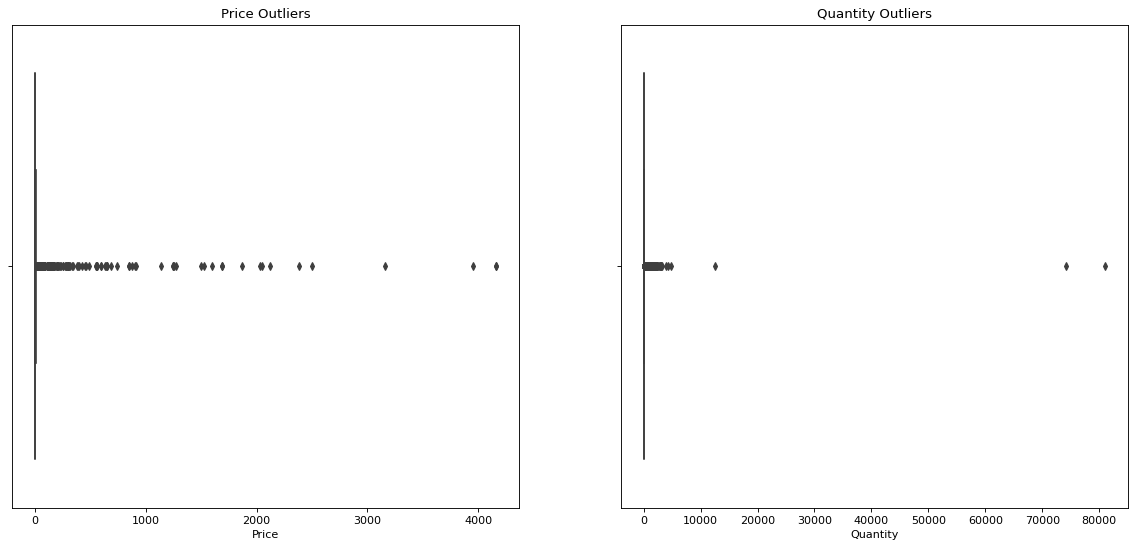

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 8), dpi=80)
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Price"])
plt.title('Price Outliers')
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Quantity"])
plt.title('Quantity Outliers')
plt.show()

In [53]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [54]:
replace_with_thresholds(df, 'Price')
replace_with_thresholds(df, 'Quantity')

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,396825.0,11.858647,25.565206,1.0,2.00,6.00,12.00,298.50
Price,396825.0,2.835319,2.982356,0.0,1.25,1.95,3.75,31.56
Customer ID,396825.0,15301.354595,1709.881541,12346.0,13975.00,15159.00,16801.00,18287.00


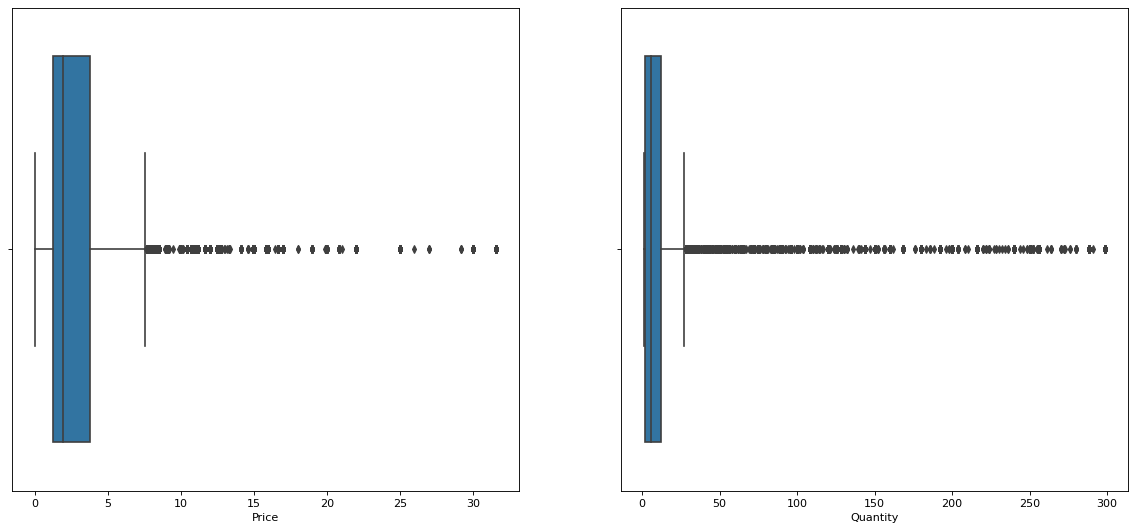

In [55]:
plt.figure(figsize=(18, 8), dpi=80)
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Price"])
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Quantity"])
plt.show()

# Görev 2: Alman Müşteriler Üzerinden Birliktelik Kuralları Üretme

### Adım 1:
Aşağıdaki gibi fatura ürün pivot table’i oluşturacak create_invoice_product_df fonksiyonunu tanımlayınız.


###### Description NINE DRAWER OFFICE TIDY SET 2 TEA TOWELS I LOVE LONDON SPACEBOY BABY GIFT SET…

###### Invoice

###### 536370 0 1 0

###### 536852 1 0 1

###### 536974 0 0 0

###### 537065 1 0 0

###### 537463 0 0 1

In [87]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.pivot_table(index='Invoice', columns='StockCode', values='Quantity').fillna(False). \
            applymap(lambda x: True if x > 0 else False)
    else:
        return dataframe.pivot_table(index='Invoice', columns='Description', values='Quantity').fillna(False). \
            applymap(lambda x: True if x > 0 else False)

In [89]:
df_ger = df[df['Country']=='Germany']

In [91]:
ger_inv_pro_df = create_invoice_product_df(df_ger)
ger_inv_pro_df

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536983,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581266,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581494,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Adım 2:
Kuralları oluşturacak create_rules fonksiyonunu tanımlayınız ve alman müşteriler için kurallarını bulunuz.

In [92]:
from mlxtend.frequent_patterns import apriori, association_rules

In [149]:
def create_rules(dataframe, id=True, country="Germany"):
    dataframe = dataframe[dataframe['Country'] == country]
    dataframe = create_invoice_product_df(dataframe, id)
    frequent_itemsets = apriori(dataframe, min_support=0.01, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
    return rules

In [153]:
rules = create_rules(df, id=False)

In [154]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( DOLLY GIRL BEAKER),(SPACEBOY BEAKER),0.015590,0.024499,0.013363,0.857143,34.987013,0.012981,6.828508
1,(SPACEBOY BEAKER),( DOLLY GIRL BEAKER),0.024499,0.015590,0.013363,0.545455,34.987013,0.012981,2.165702
2,(LUNCH BAG APPLE DESIGN),(10 COLOUR SPACEBOY PEN),0.062361,0.024499,0.011136,0.178571,7.288961,0.009608,1.187567
3,(10 COLOUR SPACEBOY PEN),(LUNCH BAG APPLE DESIGN),0.024499,0.062361,0.011136,0.454545,7.288961,0.009608,1.719005
4,(SPACEBOY LUNCH BOX ),(10 COLOUR SPACEBOY PEN),0.104677,0.024499,0.013363,0.127660,5.210832,0.010799,1.118257
...,...,...,...,...,...,...,...,...,...
17789,(ROUND SNACK BOXES SET OF4 WOODLAND ),"(BLUE SPOT CERAMIC DRAWER KNOB, WHITE SPOT RED...",0.249443,0.015590,0.011136,0.044643,2.863520,0.007247,1.030410
17790,(WHITE SPOT RED CERAMIC DRAWER KNOB),"(BLUE SPOT CERAMIC DRAWER KNOB, ROUND SNACK BO...",0.053452,0.011136,0.011136,0.208333,18.708333,0.010541,1.249092
17791,(WHITE SPOT BLUE CERAMIC DRAWER KNOB),"(BLUE SPOT CERAMIC DRAWER KNOB, ROUND SNACK BO...",0.035635,0.013363,0.011136,0.312500,23.385417,0.010660,1.435108
17792,(RED STRIPE CERAMIC DRAWER KNOB),"(BLUE SPOT CERAMIC DRAWER KNOB, ROUND SNACK BO...",0.046771,0.011136,0.011136,0.238095,21.380952,0.010615,1.297884


# Görev 3: Sepet İçerisindeki Ürün Id’leri Verilen Kullanıcılara Ürün Önerisinde Bulunma

### Adım 1:
check_id fonksiyonunu kullanarak verilen ürünlerin isimlerini bulunuz.

In [155]:
def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    return product_name


check_id(df_ger, 21987)

['PACK OF 6 SKULL PAPER CUPS']

### Adım 2:
arl_recommender fonksiyonunu kullanarak 3 kullanıcı için ürün önerisinde bulununuz.

Kullanıcı 1’in sepetinde bulunan ürünün id'si: 21987

Kullanıcı 2’in sepetinde bulunan ürünün id'si : 23235

Kullanıcı 3’in sepetinde bulunan ürünün id'si : 22747

In [156]:
rules = create_rules(df)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(16237),(22326),0.011136,0.249443,0.011136,1.000000,4.008929,0.008358,inf
1,(22326),(16237),0.249443,0.011136,0.011136,0.044643,4.008929,0.008358,1.035073
2,(20674),(20675),0.022272,0.033408,0.013363,0.600000,17.960000,0.012619,2.416481
3,(20675),(20674),0.033408,0.022272,0.013363,0.400000,17.960000,0.012619,1.629547
4,(20674),(20676),0.022272,0.037862,0.011136,0.500000,13.205882,0.010293,1.924276
...,...,...,...,...,...,...,...,...,...
18365,(22629),"(22467, 22326, 22423, 21915, 22077)",0.104677,0.011136,0.011136,0.106383,9.553191,0.009970,1.106586
18366,(22326),"(22467, 22629, 22423, 21915, 22077)",0.249443,0.011136,0.011136,0.044643,4.008929,0.008358,1.035073
18367,(22423),"(22467, 22629, 22326, 21915, 22077)",0.140312,0.011136,0.011136,0.079365,7.126984,0.009573,1.074111
18368,(21915),"(22467, 22629, 22326, 22423, 22077)",0.046771,0.011136,0.011136,0.238095,21.380952,0.010615,1.297884


In [157]:
product_id = 21987
check_id(df_ger, product_id)

['PACK OF 6 SKULL PAPER CUPS']

In [158]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

In [160]:
product_id1 = 21987
product_id2 = 23235
product_id3 = 22747

In [165]:
arl_recommender(rules, product_id1)

[21086]

In [166]:
arl_recommender(rules, product_id2)

[23243]

In [168]:
arl_recommender(rules, product_id3)

[22746]

### Adım 3:
Önerilecek ürünlerin isimlerine bakınız.

In [164]:
check_id(df_ger, 21086)

['SET/6 RED SPOTTY PAPER CUPS']

In [170]:
check_id(df_ger, 23243)

['SET OF TEA COFFEE SUGAR TINS PANTRY']

In [171]:
check_id(df_ger, 22746)

["POPPY'S PLAYHOUSE LIVINGROOM "]